In [1]:
from core.TrajectoryDF import NumPandasTraj as TrajDF
from features.spatial_features import SpatialFeatures as spatial
from features.temporal_features import TemporalFeatures as temporal
import matplotlib.pyplot as plt
from preprocessing.inter_alt import Interpolation as ip
from preprocessing.filters import Filters as filt
from utilities.conversions import Conversions as con

import utilities.constants as const
import pandas as pd
from scipy.interpolate import CubicSpline, interp2d
import numpy as np

In [2]:

# atlantic = pd.read_csv('./data/atlantic.csv')
# atlantic = con.convert_directions_to_degree_lat_lon(atlantic, 'Latitude',"Longitude")
# def convert_to_datetime(row):
#         this_date = '{}-{}-{}'.format(str(row['Date'])[0:4], str(row['Date'])[4:6], str(row['Date'])[6:])
#         this_time = '{:02d}:{:02d}:00'.format(int(row['Time']/100), int(str(row['Time'])[-2:]))
#         return '{} {}'.format(this_date, this_time)
# atlantic['DateTime'] = atlantic.apply(convert_to_datetime, axis=1)
# sample = TrajDF(atlantic,
#                          latitude='Latitude',
#                          longitude='Longitude',
#                          datetime='DateTime',
#                          traj_id='ID',
#                          rest_of_columns=[])
# gulls = pd.read_csv('./data/gulls.csv')
# sample = TrajDF(gulls,
#                 latitude='location-lat',
#                 longitude='location-long',
#                 datetime='timestamp',
#                 traj_id='tag-local-identifier',
#                 rest_of_columns=[])

rf = pd.read_csv('./data/sample.csv')
sample = TrajDF(rf, 'lat', 'lon', 'datetime', 'id')

In [3]:
%%time

linear = ip.interpolate_position(dataframe=sample,
                                time_jump=3,
                                ip_type='linear')
print(f"Original DF length: {len(sample)}")
print(f"Linear Original DF length: {len(linear)}")

Original DF length: 999
Linear Original DF length: 999
CPU times: user 13.2 ms, sys: 37.4 ms, total: 50.6 ms
Wall time: 2.24 s


In [4]:
%%time

cubic = ip.interpolate_position(dataframe=sample,
                                time_jump=3,
                                ip_type='cubic')
print(f"Original DF length: {len(sample)}")
print(f"Cubic Interpolated DF length: {len(cubic)}")

Original DF length: 999
Cubic Interpolated DF length: 1610
CPU times: user 18.1 ms, sys: 6.28 ms, total: 24.4 ms
Wall time: 1.86 s


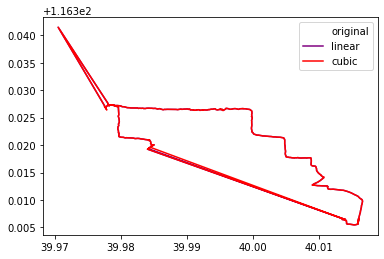

In [5]:
plt.plot(sample[const.LAT],sample[const.LONG], color='white'),
plt.plot(linear[const.LAT], linear[const.LONG], color='purple'),
plt.plot(cubic[const.LAT], cubic[const.LONG], color='red')

plt.legend(['original', 'linear', 'cubic'])
plt.show()

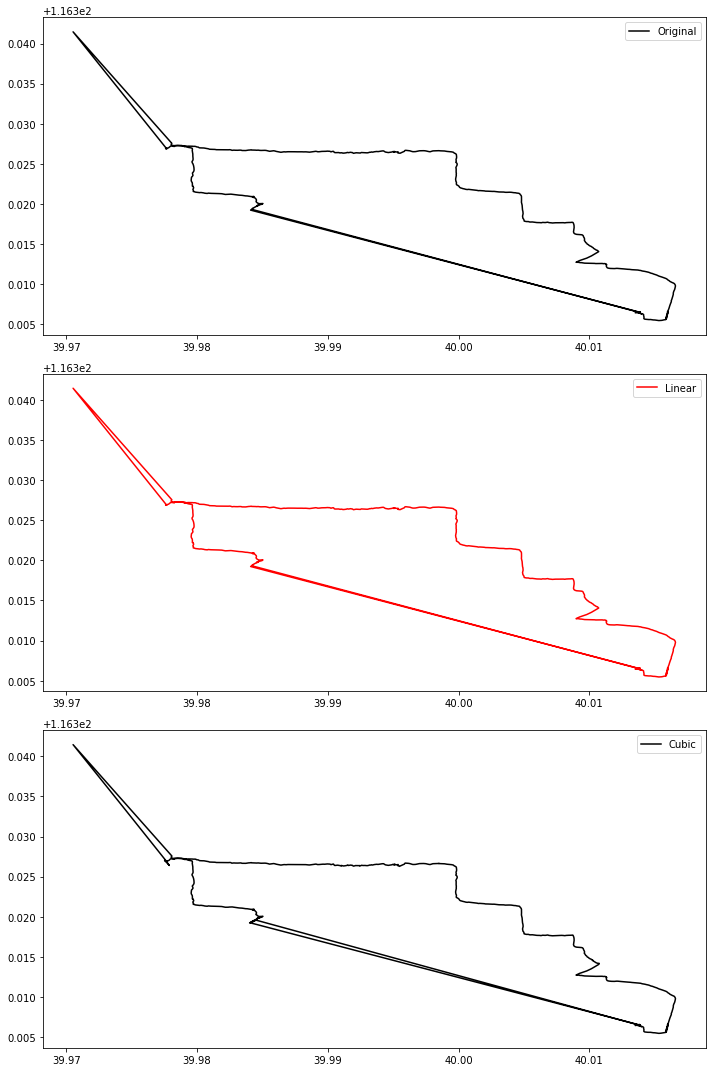

In [6]:
fig1, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))


ax1.plot(sample[const.LAT], sample[const.LONG], color='black')
ax1.legend(['Original'])
ax2.plot(linear[const.LAT], linear[const.LONG], color='red')
ax2.legend(['Linear'])
ax3.plot(cubic[const.LAT], cubic[const.LONG], color='black')
ax3.legend(['Cubic'])
plt.tight_layout()

In [7]:
linear.head()

,traj_id,lat,lon
DateTime,,,
2008-10-23 05:53:11,1,39.984224,116.319402
2008-10-23 05:53:16,1,39.984211,116.319389
2008-10-23 05:53:21,1,39.984217,116.319422
2008-10-23 05:53:23,1,39.984710,116.319865
2008-10-23 05:53:28,1,39.984674,116.319810


In [8]:
sample.head()

lat         lon
traj_id DateTime                                  
1       2008-10-23 05:53:11  39.984224  116.319402
        2008-10-23 05:53:16  39.984211  116.319389
        2008-10-23 05:53:21  39.984217  116.319422
        2008-10-23 05:53:23  39.984710  116.319865
        2008-10-23 05:53:28  39.984674  116.319810